# Identify the sentiments

## import lib

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

## import dataset

In [2]:
train = pd.read_csv(r'/content/drive/MyDrive/hackathondatascience/analiticsvidya/Identify the Sentiments/train_2kmZucJ.csv')
test = pd.read_csv(r'/content/drive/MyDrive/hackathondatascience/analiticsvidya/Identify the Sentiments/test_oJQbWVk.csv')
submission = pd.read_csv(r'/content/drive/MyDrive/hackathondatascience/analiticsvidya/Identify the Sentiments/sample_submission_LnhVWA4.csv')
pd.set_option('display.max_colwidth',200)

### dataset details visualization

In [3]:
train.shape, test.shape, submission.shape

((7920, 3), (1953, 2), (1953, 2))

In [4]:
train.head(7)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
1,2,0,Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
2,3,0,We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
3,4,0,I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
4,5,1,What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!
5,6,1,iPhone software update fucked up my phone big time Stupid iPhones
6,7,0,Happy for us .. #instapic #instadaily #us #sony #xperia #xperiaZ https://instagram.com/p/z9qGfWlvj7/


In [7]:
train['label'].value_counts()

0    5894
1    2026
Name: label, dtype: int64

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

# Load your dataset. Assuming your dataset is a CSV file named "train.csv":


# Separate your features and target variable:
X = train['tweet']
y = train['label']



ros = RandomOverSampler(random_state=0)

# Fit the sampler and create the resampled dataset:
X, y = ros.fit_resample(X.values.reshape(-1, 1), y)
# Convert X and y back to DataFrame
X_df = pd.DataFrame(X, columns=['tweet'])
y_df = pd.DataFrame(y, columns=['label'])

# Concatenate X_df and y_df to form the new DataFrame
train = pd.concat([y_df,X_df], axis=1)

# Now, you can use `X_resampled` and `y_resampled` to train your model.
train['label'].value_counts()

0    5894
1    5894
Name: label, dtype: int64

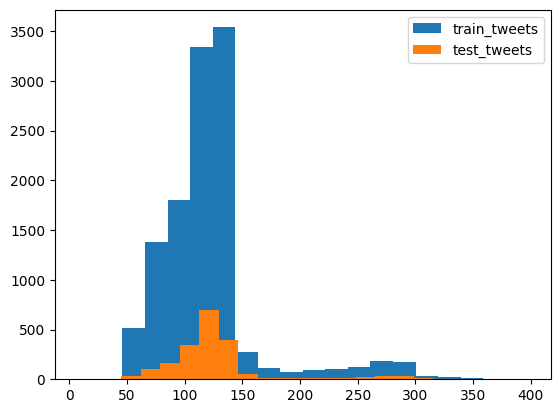

In [9]:
length_train = train['tweet'].str.len()
length_test = test['tweet'].str.len()
plt.hist(length_train, bins=20,label='train_tweets')
plt.hist(length_test,bins=20,label='test_tweets')
plt.legend()
plt.show()

### data processing

In [ ]:
# train.drop('id',axis=1,inplace=True)
# test.drop('id',axis=1,inplace=True)

In [ ]:
train[train['label']==0].head()

In [ ]:
train[train['label']==1].head()

## text preprocessing

### text cleaning

In [ ]:
# lower casing, remove links and unwanted text
def clean_tweet(text):

    # lower-case all characters
    text=text.lower()

    # remove twitter handles
    text= re.sub(r'@\S+', '',text)

    # remove urls
    text= re.sub(r'http\S+', '',text)
    text= re.sub(r'pic.\S+', '',text)



    # regex only keeps characters
    text= re.sub(r"[^a-zA-Z+']", ' ',text)


    # regex removes repeated spaces, strip removes leading and trailing spaces
    text= re.sub("\s[\s]+", " ",text).strip()
    return text

train['tweet'] =train['tweet'].apply(lambda x: clean_tweet(x))
test['tweet'] =test['tweet'].apply(lambda x: clean_tweet(x))
train.head()


In [ ]:

X = train.drop('label',axis=1)
y = train['label']

### vocab creattoion

In [ ]:
### Vocabulary size
voc_size=10000

In [ ]:
messages=X.copy()
messages['tweet'][1]

In [ ]:
messages.reset_index(inplace=True)

### stop word removel


In [ ]:
import nltk
from nltk.corpus import stopwords

### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['tweet'][i])
    review = review.lower()
    review = review.split()

    review = ' '.join(review)
    corpus.append(review)

### onehot encoding

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot
onehot_repr=[one_hot(words,voc_size)for words in corpus]

In [ ]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

In [ ]:
embedded_docs[0]

# model creation

## LSTM model

In [ ]:
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

In [ ]:
len(embedded_docs),y.shape

In [ ]:
X_final=np.array(embedded_docs)
y_final=np.array(y)

### train test split dataset

In [ ]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

### model fit

In [24]:
### Finally Training
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=15,batch_size=128)

Epoch 1/15
62/62 [==============================] - 18s 146ms/step - loss: 0.4835 - accuracy: 0.7741 - val_loss: 0.2911 - val_accuracy: 0.8838
Epoch 2/15
62/62 [==============================] - 9s 154ms/step - loss: 0.2341 - accuracy: 0.9150 - val_loss: 0.2322 - val_accuracy: 0.9162
Epoch 3/15
62/62 [==============================] - 3s 52ms/step - loss: 0.1576 - accuracy: 0.9435 - val_loss: 0.2107 - val_accuracy: 0.9250
Epoch 4/15
62/62 [==============================] - 3s 47ms/step - loss: 0.1166 - accuracy: 0.9619 - val_loss: 0.2164 - val_accuracy: 0.9260
Epoch 5/15
62/62 [==============================] - 2s 30ms/step - loss: 0.0897 - accuracy: 0.9710 - val_loss: 0.2526 - val_accuracy: 0.9270
Epoch 6/15
62/62 [==============================] - 2s 36ms/step - loss: 0.0654 - accuracy: 0.9805 - val_loss: 0.2265 - val_accuracy: 0.9244
Epoch 7/15
62/62 [==============================] - 2s 27ms/step - loss: 0.0500 - accuracy: 0.9854 - val_loss: 0.2917 - val_accuracy: 0.9252
Epoch 8/15

### predict the sentiment using threshold

In [85]:
def predicter(model, x, threshold=0.8):
    # Make a prediction
    pred = model.predict(x)
    # Apply the threshold
    pred = (pred >= threshold).astype(int)
    return pred
y_pred = predicter(model, X_test)


122/122 [==============================] - 1s 5ms/step


In [86]:
from sklearn.metrics import roc_curve, auc

def find_best_threshold(model, x, y):
    # Get the model's prediction probabilities
    pred_probs = model.predict(x)

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y, pred_probs)

    # Calculate the AUC
    auc_score = auc(fpr, tpr)

    # Find the optimal threshold
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]

    return optimal_threshold, auc_score

122/122 [==============================] - 0s 3ms/step
Optimal threshold for training data: 0.6152688264846802
Optimal threshold for test data: 0.8143773674964905


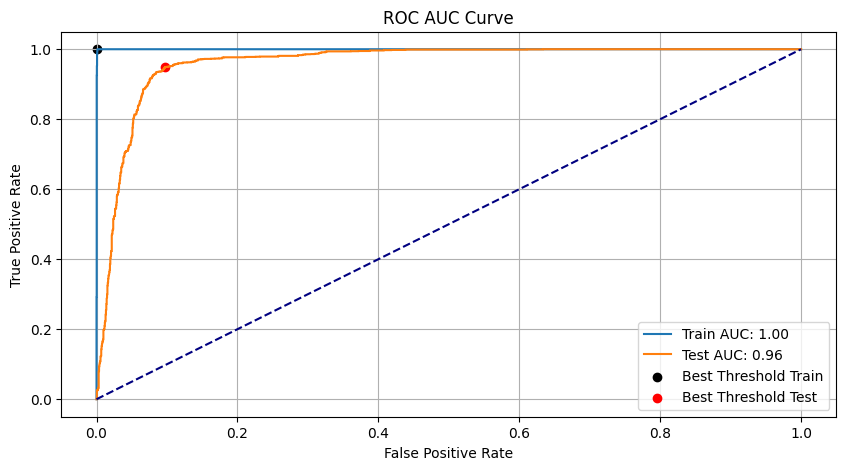

In [87]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

def plot_roc_auc_curve(model, X_train, Y_train, X_test, Y_test):
    # Calculate the ROC curve points
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    fpr_train, tpr_train, thresholds_train = roc_curve(Y_train, y_train_pred)
    fpr_test, tpr_test, thresholds_test = roc_curve(Y_test, y_test_pred)

    # Calculate the AUC (Area Under Curve)
    auc_train = auc(fpr_train, tpr_train)
    auc_test = auc(fpr_test, tpr_test)

    # Find the optimal threshold
    optimal_idx_train = np.argmax(tpr_train - fpr_train)
    optimal_threshold_train = thresholds_train[optimal_idx_train]
    optimal_idx_test = np.argmax(tpr_test - fpr_test)
    optimal_threshold_test = thresholds_test[optimal_idx_test]

    print(f'Optimal threshold for training data: {optimal_threshold_train}')
    print(f'Optimal threshold for test data: {optimal_threshold_test}')

    # Plot the ROC curve
    plt.figure(figsize=(10, 5))
    plt.plot(fpr_train, tpr_train, label=f'Train AUC: {auc_train:.2f}')
    plt.plot(fpr_test, tpr_test, label=f'Test AUC: {auc_test:.2f}')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.scatter(fpr_train[optimal_idx_train], tpr_train[optimal_idx_train], marker='o', color='black', label='Best Threshold Train')
    plt.scatter(fpr_test[optimal_idx_test], tpr_test[optimal_idx_test], marker='o', color='red', label='Best Threshold Test')
    plt.title('ROC AUC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

# Call the function
plot_roc_auc_curve(model, X_train, y_train, X_test, y_test)


In [88]:
optimal_threshold, auc_score = find_best_threshold(model, X_test, y_test)
print(f'Optimal threshold: {optimal_threshold}')
print(f'AUC score: {auc_score}')

122/122 [==============================] - 0s 3ms/step
Optimal threshold: 0.8143773674964905
AUC score: 0.961026603412271


### evaluation

confusion_matrix: [[1750  189]
 [  99 1853]]
Confusion Matrix:
[[1750  189]
 [  99 1853]]


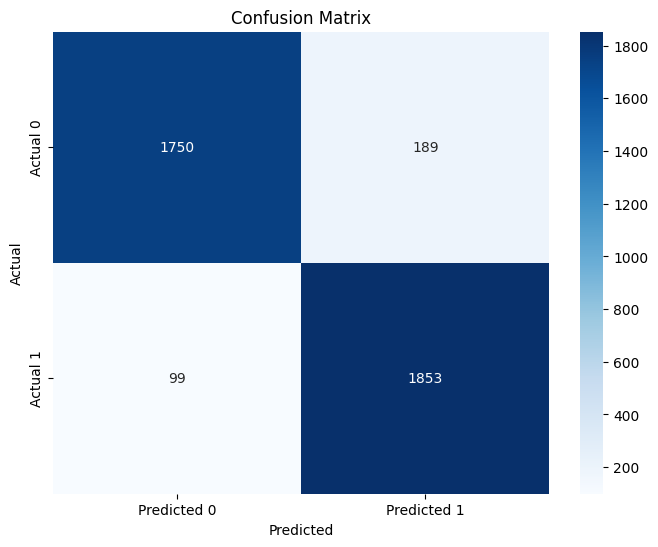

In [100]:
from sklearn.metrics import confusion_matrix
print(f'confusion_matrix: {confusion_matrix(y_test,y_pred)}')

print(f'Confusion Matrix:\n{confusion_matrix(y_test,y_pred)}')

# Plot the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [90]:
from sklearn.metrics import accuracy_score
print(f'accuracy_score: {accuracy_score(y_test,y_pred)}')

accuracy_score: 0.9259830377794911


### model saving

In [91]:
# saving model
filename = 'nlp_model.h5'
model.save(filename)


In [92]:
Z = test
### Vocabulary size
voc_size=10000

messages=Z.copy()
messages['tweet'][2]

"i'd like to puts some cd roms on my ipad is that possible ' yes but wouldn't that block the screen"

In [93]:
messages.reset_index(inplace=True)

In [94]:
import nltk
from nltk.corpus import stopwords

### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):

    review = re.sub('[^a-zA-Z]', ' ', messages['tweet'][i])
    review = review.lower()
    review = review.split()

    review = ' '.join(review)
    corpus.append(review)

In [95]:
from tensorflow.keras.preprocessing.text import one_hot
onehot_repr=[one_hot(words,voc_size)for words in corpus]

In [96]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 4479 8353 7176]
 [   0    0    0 ... 9429  840 6103]
 [8804 5208 8098 ... 9557 9230 3488]
 ...
 [1132 9125 5824 ... 9812 8353 9125]
 [   0    0    0 ... 6542 8353 5208]
 [   0    0    0 ...  368 8209  605]]


In [97]:
pred = predict(model,embedded_docs)

NameError: ignored

In [84]:
submission['label'] = pred
submission.to_csv(f'submission.csv',index=False)

NameError: ignored

In [60]:
submission

,id,label
0,7921,0
1,7922,0
2,7923,0
3,7924,0
4,7925,0
...,...,...
1948,9869,0
1949,9870,0
1950,9871,0
1951,9872,0


## fasttext model

### download and configurations

In [ ]:
# !wget -P /content/drive/MyDrive/hackathondatascience/analiticsvidya/Identify\ the\ Sentiments https://github.com/facebookresearch/fastText/archive/v0.9.2.zip

In [ ]:
# !unzip /content/drive/MyDrive/hackathondatascience/analiticsvidya/Identify\ the\ Sentiments/v0.9.2.zip -d /content/drive/MyDrive/hackathondatascience/analiticsvidya/Identify\ the\ Sentiments


In [ ]:
# !pip install -e /content/drive/MyDrive/hackathondatascience/analiticsvidya/Identify\ the\ Sentiments/fastText-0.9.2/

### text processing for the case

In [ ]:
ft_train

In [ ]:

!pip install fasttext


In [ ]:
import fasttext
ft_train=train
ft_test=test

In [ ]:
ft_train.label.unique()

In [ ]:
# process data for fasttext supervised learning format

ft_train['label'] = '__label__' + ft_train['label'].astype(str)
ft_train.head(5)

In [ ]:
ft_train['ft_trainingprocessed'] = ft_train['label'] + ' ' + ft_train['tweet']
ft_train.head(3)

In [ ]:
def preprocess(text):
    text = re.sub(r'[^\w\s\']',' ', text)
    text = re.sub(' +', ' ', text)

    return text.strip().lower()

ft_train['ft_trainingprocessed'] = ft_train['ft_trainingprocessed'].map(preprocess)
ft_train.head()

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(ft_train, test_size=0.2)
train.shape, test.shape

In [ ]:
train.to_csv("sentiment.train", columns=["ft_trainingprocessed"], index=False, header=False)
test.to_csv("sentiment.test", columns=["ft_trainingprocessed"], index=False, header=False)

In [ ]:
model = fasttext.train_supervised(input="sentiment.train")
model.test("sentiment.test")

In [ ]:
model.predict("what amazing service apple won't even talk to me about a question i have unless i pay them for their stupid support")